In [1]:
import pysal
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt


/Users/serge/anaconda3/envs/pbpl204/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
odf = geopandas.read_file('azca.shp')

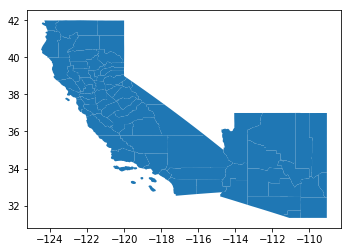

In [3]:
odf.plot()

In [4]:
odf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.655585 39.69356, -120.655524 39..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.188571 38.714308, -121.18731 38..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"(POLYGON ((-120.581897 34.098557, -120.582264 ..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-120.630933 38.3411, -120.630566 38...."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"(POLYGON ((-119.636302 33.27304, -119.636068 3..."


In [5]:
import pandas

## Labor Market Data

Source: [Labor Force and Unemployment Rate for California Counties](https://data.edd.ca.gov/Labor-Force-and-Unemployment-Rates/Labor-Force-and-Unemployment-Rate-for-California-C/r8rw-9pxx)

In [6]:
lf_df = pandas.read_csv('Labor_Force_and_Unemployment_Rate_for_California_Counties.csv')

In [7]:
lf_df.head()

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,County,Alameda County,04/01/2019,2019,April,N,Preliminary,844100,821500,22600,0.027
1,County,Yuba County,04/01/2019,2019,April,N,Preliminary,28900,27000,1900,0.064
2,County,Yolo County,04/01/2019,2019,April,N,Preliminary,108600,104300,4300,0.040
3,County,Ventura County,04/01/2019,2019,April,N,Preliminary,425000,411400,13600,0.032
4,County,Tuolumne County,04/01/2019,2019,April,N,Preliminary,21160,20170,980,0.046


In [8]:
lf_df.columns

Index(['Area Type ', 'Area Name ', 'Date', 'Year ', 'Month',
       'Seasonally Adjusted (Y/N) ', 'Status (Preliminary / Final) ',
       'Labor Force', 'Employment ', 'Unemployment ', 'Unemployment Rate '],
      dtype='object')

In [9]:
pandas.unique(lf_df['Area Name ']).shape

(58,)

In [10]:
pandas.unique(lf_df['Month'])

array(['April', 'March', 'February', 'January', 'December', 'November',
       'October', 'September', 'August', 'July', 'June', 'May'],
      dtype=object)

In [11]:
# april 2019
apr_2019 = lf_df.iloc[:59]

In [12]:
apr_2019

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,County,Alameda County,04/01/2019,2019,April,N,Preliminary,844100,821500,22600,0.027
1,County,Yuba County,04/01/2019,2019,April,N,Preliminary,28900,27000,1900,0.064
2,County,Yolo County,04/01/2019,2019,April,N,Preliminary,108600,104300,4300,0.040
3,County,Ventura County,04/01/2019,2019,April,N,Preliminary,425000,411400,13600,0.032
4,County,Tuolumne County,04/01/2019,2019,April,N,Preliminary,21160,20170,980,0.046
5,County,Tulare County,04/01/2019,2019,April,N,Preliminary,208400,187900,20500,0.098
6,County,Trinity County,04/01/2019,2019,April,N,Preliminary,4510,4240,280,0.061
7,County,Tehama County,04/01/2019,2019,April,N,Preliminary,25270,23790,1480,0.059
8,County,Sutter County,04/01/2019,2019,April,N,Preliminary,45500,41600,3800,0.084
9,County,Stanislaus County,04/01/2019,2019,April,N,Preliminary,239900,224600,15300,0.064


In [13]:
odf.merge(apr_2019, left_on='NAMELSAD', right_on='Area Name ')

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,...,Sierra County,04/01/2019,2019,April,N,Preliminary,1240,1160,80,0.068
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,Sacramento County,04/01/2019,2019,April,N,Preliminary,709300,684500,24800,0.035
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,...,Santa Barbara County,04/01/2019,2019,April,N,Preliminary,217500,209900,7600,0.035
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,Calaveras County,04/01/2019,2019,April,N,Preliminary,21210,20410,800,0.038
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,Ventura County,04/01/2019,2019,April,N,Preliminary,425000,411400,13600,0.032
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,...,Los Angeles County,04/01/2019,2019,April,Y,Preliminary,5129000,4893900,235100,0.046
6,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,...,Los Angeles County,04/01/2019,2019,April,N,Preliminary,5055900,4853000,203000,0.040
7,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,...,Sonoma County,04/01/2019,2019,April,N,Preliminary,259200,252600,6600,0.026
8,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,...,Kings County,04/01/2019,2019,April,N,Preliminary,57800,53000,4800,0.083
9,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,...,San Diego County,04/01/2019,2019,April,N,Preliminary,1574800,1528100,46600,0.030


In [14]:
jdf = odf.merge(apr_2019, left_on='NAMELSAD', right_on='Area Name ')

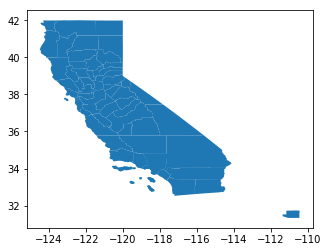

In [15]:
jdf.plot()

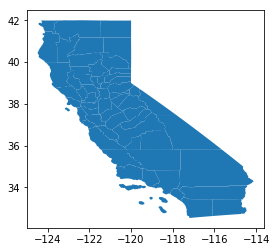

In [16]:
ca = odf[odf.STATEFP=='06']
ca.plot()

In [17]:
ca.shape

(58, 18)

In [18]:
cajoin = ca.merge(apr_2019, left_on='NAMELSAD', right_on='Area Name ')

In [19]:
cajoin.shape

(59, 29)

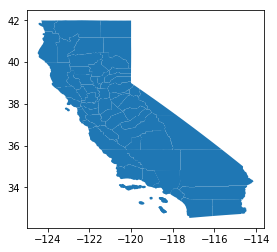

In [20]:
cajoin.plot()

In [21]:
cajoin.shape

(59, 29)

In [22]:
cajoin.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,...,Sierra County,04/01/2019,2019,April,N,Preliminary,1240,1160,80,0.068
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,Sacramento County,04/01/2019,2019,April,N,Preliminary,709300,684500,24800,0.035
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,...,Santa Barbara County,04/01/2019,2019,April,N,Preliminary,217500,209900,7600,0.035
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,Calaveras County,04/01/2019,2019,April,N,Preliminary,21210,20410,800,0.038
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,Ventura County,04/01/2019,2019,April,N,Preliminary,425000,411400,13600,0.032


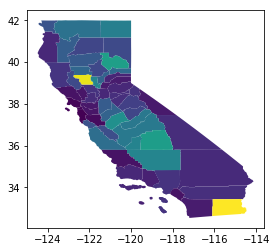

In [23]:
cajoin.plot(column='Unemployment Rate ')

In [24]:
cajoin.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'Area Type ',
       'Area Name ', 'Date', 'Year ', 'Month', 'Seasonally Adjusted (Y/N) ',
       'Status (Preliminary / Final) ', 'Labor Force', 'Employment ',
       'Unemployment ', 'Unemployment Rate '],
      dtype='object')

In [25]:
cajoin1 = cajoin['Seasonally Adjusted (Y/N) ']=='N'
cajoin1 = cajoin[cajoin1]
cajoin1.shape

(58, 29)

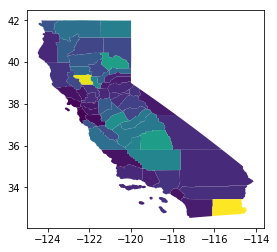

In [31]:
cajoin1.plot('Unemployment Rate ')

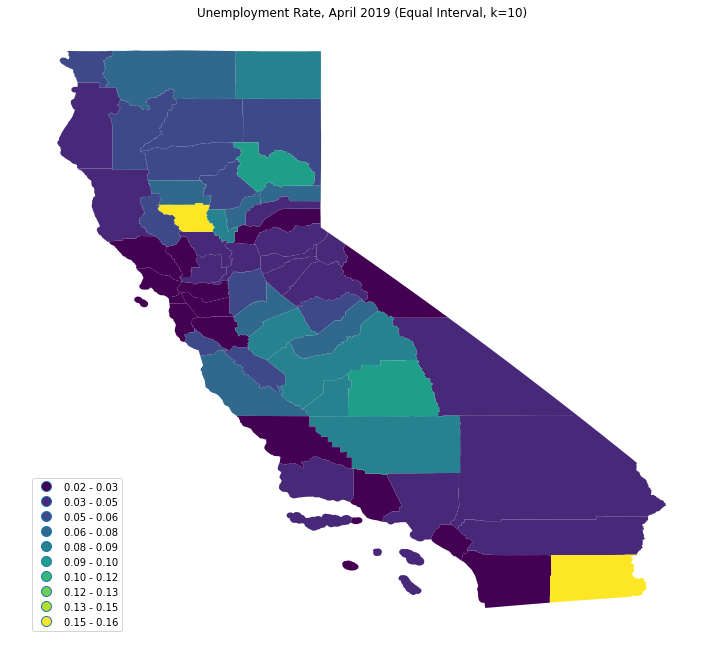

In [35]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = cajoin1.plot(column='Unemployment Rate ',scheme='equal_interval', k= 10, axes=ax, legend=True,
            legend_kwds={'loc': 'lower left'})
ax.set_axis_off()
plt.title('Unemployment Rate, April 2019 (Equal Interval, k=10)')
plt.show()

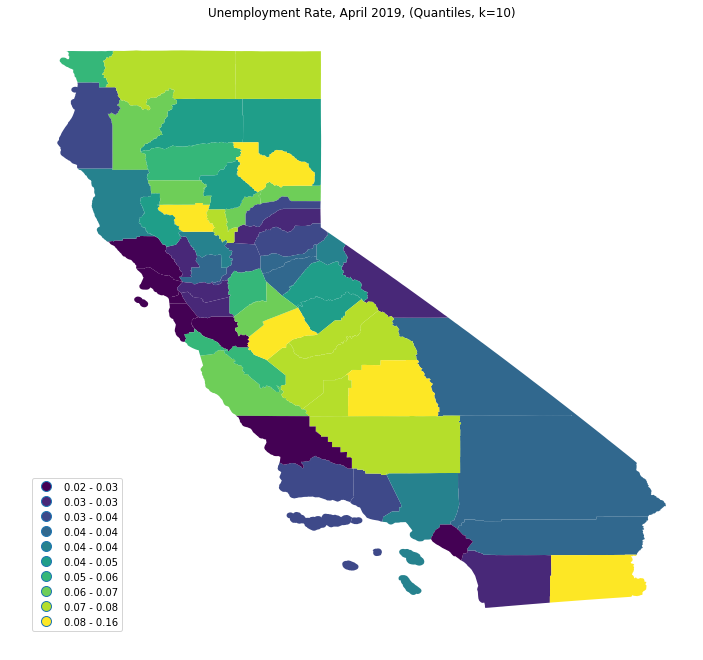

In [36]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = cajoin1.plot(column='Unemployment Rate ',scheme='quantiles', k= 10, axes=ax, legend=True,
            legend_kwds={'loc': 'lower left'})
ax.set_axis_off()
plt.title('Unemployment Rate, April 2019, (Quantiles, k=10)')
plt.show()

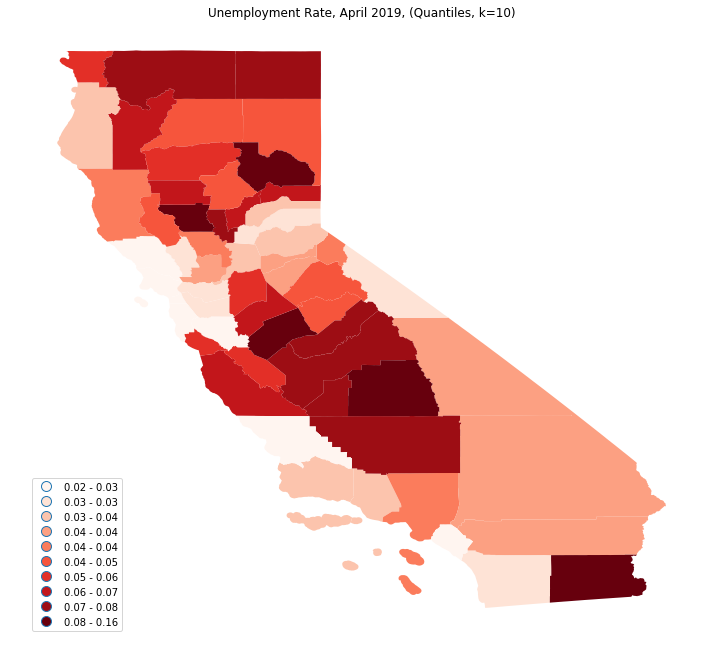

In [37]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = cajoin1.plot(column='Unemployment Rate ',scheme='quantiles', k= 10, axes=ax, legend=True,
                  cmap='Reds', legend_kwds={'loc': 'lower left'})
ax.set_axis_off()
plt.title('Unemployment Rate, April 2019, (Quantiles, k=10)')
plt.show()

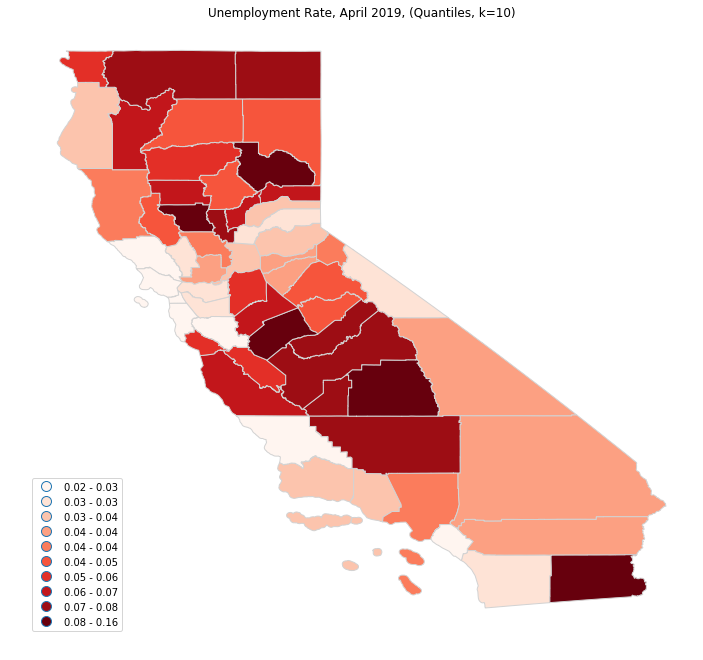

In [38]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = cajoin1.plot(column='Unemployment Rate ',scheme='quantiles', k= 10, axes=ax, legend=True,
                  cmap='Reds', legend_kwds={'loc': 'lower left'}, edgecolor='lightgrey')
ax.set_axis_off()
plt.title('Unemployment Rate, April 2019, (Quantiles, k=10)')
plt.show()

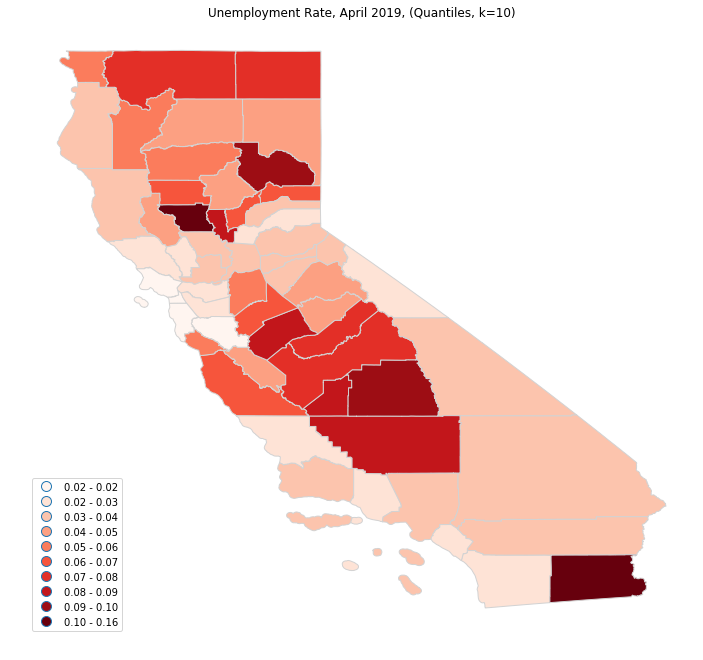

In [39]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = cajoin1.plot(column='Unemployment Rate ',scheme='fisher_jenks', k= 10, axes=ax, legend=True,
                  cmap='Reds', legend_kwds={'loc': 'lower left'}, edgecolor='lightgrey')
ax.set_axis_off()
plt.title('Unemployment Rate, April 2019, (Quantiles, k=10)')
plt.show()

In [42]:
from pysal.esda.mapclassify import Fisher_Jenks
y = cajoin1['Unemployment Rate ']

In [43]:
fj10 = Fisher_Jenks(y, k=10)

In [44]:
fj10

             Fisher_Jenks             
 
Lower          Upper             Count
        x[i] <= 0.023                4
0.023 < x[i] <= 0.032               10
0.032 < x[i] <= 0.041               15
0.041 < x[i] <= 0.053                7
0.053 < x[i] <= 0.061                5
0.061 < x[i] <= 0.070                5
0.070 < x[i] <= 0.080                4
0.080 < x[i] <= 0.090                4
0.090 < x[i] <= 0.099                2
0.099 < x[i] <= 0.162                2

In [46]:
q10 = pysal.esda.mapclassify.Quantiles(y,k=10)

In [47]:
q10

              Quantiles              
 
Lower          Upper            Count
        x[i] <= 0.026               7
0.026 < x[i] <= 0.030               6
0.030 < x[i] <= 0.035               6
0.035 < x[i] <= 0.038               6
0.038 < x[i] <= 0.043               4
0.043 < x[i] <= 0.051               6
0.051 < x[i] <= 0.061               5
0.061 < x[i] <= 0.072               6
0.072 < x[i] <= 0.084               7
0.084 < x[i] <= 0.162               5

In [49]:
fj10.adcm

0.10099999999999995

In [50]:
q10.adcm

0.22300000000000003